 - https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/
 - https://github.com/alexvlis/extractive-document-summarization

In [2]:
from rouge import Rouge
import os
from nltk import tokenize

In [3]:
import gensim
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk

Using TensorFlow backend.


In [4]:
rouge = Rouge()

In [5]:
import numpy as np
import pandas as pd
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")

# Train.py

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import *
from sklearn.utils import shuffle

In [8]:
print("loading pickle files...")
data1 = pickle.load(open("wordEmbeddingsToSaliency1.pickle", "rb"))
data2 = pickle.load(open("wordEmbeddingsToSaliency2.pickle", "rb"))
data3 = pickle.load(open("wordEmbeddingsToSaliency3.pickle", "rb"))
data4 = pickle.load(open("wordEmbeddingsToSaliency4.pickle", "rb"))
data5 = pickle.load(open("wordEmbeddingsToSaliency5.pickle", "rb"))
data6 = pickle.load(open("wordEmbeddingsToSaliency6.pickle", "rb"))
data7 = pickle.load(open("wordEmbeddingsToSaliency7.pickle", "rb"))
data8 = pickle.load(open("wordEmbeddingsToSaliency8.pickle", "rb"))

loading pickle files...


In [9]:
print("concatenating data...")
data = np.concatenate((data1, data2, data3, data4, data5, data6, data7, data8), axis=0)

concatenating data...


In [ ]:
print("extracting x and y...")
x = data[::2]
y = data[1::2]

x1 = np.dstack(x)
x2 = np.rollaxis(x1, -1)
x3 = np.array(x2)
x4 =np.expand_dims(x3, 3)
x4.shape

extracting x and y...


In [ ]:
# Model Hyperparameters
conv_window_size = (3, 300)
num_filters = 50
reg = 0.01
dropout = 0.5

# Training parameters
epochs = 10
batch_size = 256
test_train_ratio = 0.2
val_train_ratio = 0.2

x_train, y_train = x4,y
print("training data:", x_train.shape, y_train.shape)

In [ ]:
y_train = y_train.reshape(len(y_train),1)

In [ ]:
print("training data:", x_train.shape, y_train.shape)

### convolution network implimentation

In [ ]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(x_train.shape[1], x_train.shape[2],1),
                    filters=num_filters,
                    kernel_size=conv_window_size,
                    padding="valid",
                    activation="relu",
                    data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(num_filters, 1)))    
model.add(layers.Flatten())
model.add(layers.Dropout(dropout))
model.add(layers.Dense(3, activation='tanh', kernel_regularizer=regularizers.l2(reg)))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(reg)))

model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adadelta(),metrics=['mae'])


In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model, to_file='model.png'
)


In [ ]:
#y_train = y_train.reshape(len(y_train),1)
y_train = y_train.astype(str).astype(float)

In [15]:
type(x_train),x_train.shape,type(y_train),y_train.shape

(numpy.ndarray, (12828, 250, 300, 1), numpy.ndarray, (12828, 1))

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=600,
                    validation_split=val_train_ratio)

Train on 10262 samples, validate on 2566 samples
Epoch 1/600
10262/10262 [==============================] - 31s 3ms/sample - loss: 0.7672 - mae: 0.4183 - val_loss: 0.7672 - val_mae: 0.4454
Epoch 2/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7671 - mae: 0.4182 - val_loss: 0.7670 - val_mae: 0.4453
Epoch 3/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7669 - mae: 0.4181 - val_loss: 0.7668 - val_mae: 0.4452
Epoch 4/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7667 - mae: 0.4181 - val_loss: 0.7666 - val_mae: 0.4452
Epoch 5/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7664 - mae: 0.4180 - val_loss: 0.7663 - val_mae: 0.4451
Epoch 6/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.7662 - mae: 0.4179 - val_loss: 0.7661 - val_mae: 0.4450
Epoch 7/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.7660 - mae: 0.4178 - val_lo

Epoch 59/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7495 - mae: 0.4104 - val_loss: 0.7485 - val_mae: 0.4374
Epoch 60/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.7491 - mae: 0.4102 - val_loss: 0.7481 - val_mae: 0.4372
Epoch 61/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.7487 - mae: 0.4100 - val_loss: 0.7476 - val_mae: 0.4370
Epoch 62/600
10262/10262 [==============================] - 25s 2ms/sample - loss: 0.7484 - mae: 0.4098 - val_loss: 0.7472 - val_mae: 0.4368
Epoch 63/600
10262/10262 [==============================] - 25s 2ms/sample - loss: 0.7479 - mae: 0.4096 - val_loss: 0.7468 - val_mae: 0.4367
Epoch 64/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.7475 - mae: 0.4094 - val_loss: 0.7464 - val_mae: 0.4365
Epoch 65/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7471 - mae: 0.4092 - val_loss: 0.7460 - val_mae: 0.4363
Epoch 66/600


Epoch 117/600
10262/10262 [==============================] - 25s 2ms/sample - loss: 0.7225 - mae: 0.3965 - val_loss: 0.7197 - val_mae: 0.4234
Epoch 118/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.7219 - mae: 0.3962 - val_loss: 0.7191 - val_mae: 0.4231
Epoch 119/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7213 - mae: 0.3958 - val_loss: 0.7185 - val_mae: 0.4228
Epoch 120/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7208 - mae: 0.3955 - val_loss: 0.7179 - val_mae: 0.4225
Epoch 121/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.7201 - mae: 0.3951 - val_loss: 0.7173 - val_mae: 0.4221
Epoch 122/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7196 - mae: 0.3949 - val_loss: 0.7167 - val_mae: 0.4218
Epoch 123/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.7190 - mae: 0.3945 - val_loss: 0.7161 - val_mae: 0.4215
Epoch 

Epoch 175/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.6819 - mae: 0.3723 - val_loss: 0.6765 - val_mae: 0.3991
Epoch 176/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.6810 - mae: 0.3717 - val_loss: 0.6755 - val_mae: 0.3985
Epoch 177/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.6804 - mae: 0.3712 - val_loss: 0.6746 - val_mae: 0.3979
Epoch 178/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.6794 - mae: 0.3706 - val_loss: 0.6736 - val_mae: 0.3974
Epoch 179/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.6786 - mae: 0.3701 - val_loss: 0.6726 - val_mae: 0.3968
Epoch 180/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.6777 - mae: 0.3696 - val_loss: 0.6717 - val_mae: 0.3962
Epoch 181/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.6766 - mae: 0.3688 - val_loss: 0.6707 - val_mae: 0.3956
Epoch 

Epoch 233/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.6169 - mae: 0.3272 - val_loss: 0.6057 - val_mae: 0.3535
Epoch 234/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.6157 - mae: 0.3263 - val_loss: 0.6042 - val_mae: 0.3524
Epoch 235/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.6142 - mae: 0.3251 - val_loss: 0.6026 - val_mae: 0.3513
Epoch 236/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.6126 - mae: 0.3240 - val_loss: 0.6011 - val_mae: 0.3503
Epoch 237/600
10262/10262 [==============================] - 25s 2ms/sample - loss: 0.6114 - mae: 0.3231 - val_loss: 0.5995 - val_mae: 0.3492
Epoch 238/600
10262/10262 [==============================] - 25s 2ms/sample - loss: 0.6098 - mae: 0.3218 - val_loss: 0.5979 - val_mae: 0.3481
Epoch 239/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.6081 - mae: 0.3207 - val_loss: 0.5964 - val_mae: 0.3470
Epoch 

Epoch 291/600
10262/10262 [==============================] - 25s 2ms/sample - loss: 0.5258 - mae: 0.2526 - val_loss: 0.5044 - val_mae: 0.2772
Epoch 292/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.5236 - mae: 0.2506 - val_loss: 0.5025 - val_mae: 0.2757
Epoch 293/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.5224 - mae: 0.2496 - val_loss: 0.5007 - val_mae: 0.2742
Epoch 294/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.5207 - mae: 0.2480 - val_loss: 0.4989 - val_mae: 0.2727
Epoch 295/600
10262/10262 [==============================] - 25s 2ms/sample - loss: 0.5189 - mae: 0.2464 - val_loss: 0.4971 - val_mae: 0.2711
Epoch 296/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.5175 - mae: 0.2451 - val_loss: 0.4952 - val_mae: 0.2696
Epoch 297/600
10262/10262 [==============================] - 24s 2ms/sample - loss: 0.5156 - mae: 0.2434 - val_loss: 0.4934 - val_mae: 0.2681
Epoch 

Epoch 349/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4449 - mae: 0.1726 - val_loss: 0.4116 - val_mae: 0.1940
Epoch 350/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4443 - mae: 0.1719 - val_loss: 0.4104 - val_mae: 0.1928
Epoch 351/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4435 - mae: 0.1710 - val_loss: 0.4091 - val_mae: 0.1916
Epoch 352/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.4420 - mae: 0.1696 - val_loss: 0.4079 - val_mae: 0.1903
Epoch 353/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4406 - mae: 0.1679 - val_loss: 0.4067 - val_mae: 0.1891
Epoch 354/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4398 - mae: 0.1670 - val_loss: 0.4055 - val_mae: 0.1879
Epoch 355/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.4394 - mae: 0.1661 - val_loss: 0.4043 - val_mae: 0.1868
Epoch 

Epoch 407/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4010 - mae: 0.1217 - val_loss: 0.3581 - val_mae: 0.1389
Epoch 408/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4004 - mae: 0.1214 - val_loss: 0.3575 - val_mae: 0.1382
Epoch 409/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4000 - mae: 0.1208 - val_loss: 0.3569 - val_mae: 0.1375
Epoch 410/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.4001 - mae: 0.1205 - val_loss: 0.3563 - val_mae: 0.1369
Epoch 411/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.3991 - mae: 0.1195 - val_loss: 0.3556 - val_mae: 0.1362
Epoch 412/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3989 - mae: 0.1190 - val_loss: 0.3550 - val_mae: 0.1355
Epoch 413/600
10262/10262 [==============================] - 22s 2ms/sample - loss: 0.3984 - mae: 0.1183 - val_loss: 0.3544 - val_mae: 0.1349
Epoch 

Epoch 465/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3812 - mae: 0.0978 - val_loss: 0.3320 - val_mae: 0.1109
Epoch 466/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3813 - mae: 0.0972 - val_loss: 0.3317 - val_mae: 0.1106
Epoch 467/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3811 - mae: 0.0974 - val_loss: 0.3314 - val_mae: 0.1103
Epoch 468/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3802 - mae: 0.0964 - val_loss: 0.3311 - val_mae: 0.1100
Epoch 469/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3801 - mae: 0.0967 - val_loss: 0.3308 - val_mae: 0.1097
Epoch 470/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3797 - mae: 0.0963 - val_loss: 0.3305 - val_mae: 0.1094
Epoch 471/600
10262/10262 [==============================] - 23s 2ms/sample - loss: 0.3799 - mae: 0.0957 - val_loss: 0.3302 - val_mae: 0.1091
Epoch 

Epoch 523/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3707 - mae: 0.0859 - val_loss: 0.3178 - val_mae: 0.0972
Epoch 524/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3706 - mae: 0.0863 - val_loss: 0.3176 - val_mae: 0.0970
Epoch 525/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3703 - mae: 0.0857 - val_loss: 0.3174 - val_mae: 0.0969
Epoch 526/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3704 - mae: 0.0856 - val_loss: 0.3173 - val_mae: 0.0967
Epoch 527/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3698 - mae: 0.0852 - val_loss: 0.3171 - val_mae: 0.0965
Epoch 528/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3694 - mae: 0.0850 - val_loss: 0.3169 - val_mae: 0.0964
Epoch 529/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3699 - mae: 0.0852 - val_loss: 0.3167 - val_mae: 0.0962
Epoch 

Epoch 581/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3638 - mae: 0.0794 - val_loss: 0.3088 - val_mae: 0.0897
Epoch 582/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3637 - mae: 0.0796 - val_loss: 0.3087 - val_mae: 0.0896
Epoch 583/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3636 - mae: 0.0794 - val_loss: 0.3086 - val_mae: 0.0895
Epoch 584/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3637 - mae: 0.0796 - val_loss: 0.3084 - val_mae: 0.0894
Epoch 585/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3636 - mae: 0.0794 - val_loss: 0.3083 - val_mae: 0.0893
Epoch 586/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3632 - mae: 0.0792 - val_loss: 0.3082 - val_mae: 0.0892
Epoch 587/600
10262/10262 [==============================] - 21s 2ms/sample - loss: 0.3634 - mae: 0.0792 - val_loss: 0.3081 - val_mae: 0.0891
Epoch 

In [21]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

Plotting...


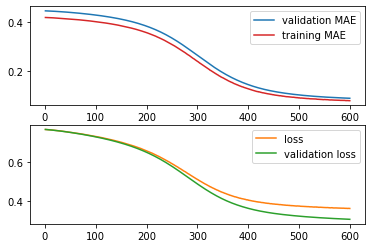

Done.


In [22]:
epochs=600
print("Plotting...")
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(1, epochs+1), history.history['val_mae'], 'tab:blue', label="validation MAE")
ax1.plot(range(1, epochs+1), history.history['mae'], 'tab:red', label="training MAE")

ax2.plot(range(1, epochs+1), history.history['loss'], 'tab:orange', label="loss")
ax2.plot(range(1, epochs+1), history.history['val_loss'], 'tab:green', label="validation loss")

ax1.legend()
ax2.legend()

f.savefig('training-softmax.png', dpi=300)
plt.show()
print("Done.")

In [23]:
print("Saving model...")
model.save('Model-Softmax-cnn.h5')

Saving model...
